In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Run for each Explainer

# XAI Analysis


## Sensitivity and Infidelity

In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path_NCNN = "RGU\\NCNN\\explainers.csv"
path_VGG = "RGU\\VGGFace\\explainers.csv"
path_ViT = "RGU\\ViT_B_32\\explainers.csv"

In [ ]:
NCNN_df = pd.read_csv(path_NCNN)
NCNN_df['correct'] = NCNN_df['label'] == NCNN_df['prediction']
NCNN_df['model'] = "NCNN"

VGG_df = pd.read_csv(path_VGG)
VGG_df['correct'] = VGG_df['label'] == VGG_df['prediction']
VGG_df['model'] = "VGGFace"

ViT_df = pd.read_csv(path_ViT)
ViT_df['correct'] = ViT_df['label'] == ViT_df['prediction']
ViT_df['model'] = "ViT"

In [ ]:
NCNN_df

## NCNN

### All


In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=NCNN_df, y='sensitivity', x='XAI_name')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(data=NCNN_df, y='infidelity', x='XAI_name')
plt.xticks(rotation=90)

### By label

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=NCNN_df, y='sensitivity', x='XAI_name', hue='label')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(data=NCNN_df, y='infidelity', x='XAI_name', hue='label')
plt.xticks(rotation=90)


### By correct prediction

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=NCNN_df, y='sensitivity', x='XAI_name', hue='correct')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(data=NCNN_df, y='infidelity', x='XAI_name', hue='correct')
plt.xticks(rotation=90)


## VGG-Face

### All

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=VGG_df, y='sensitivity', x='XAI_name')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(data=VGG_df, y='infidelity', x='XAI_name')
plt.xticks(rotation=90)

### By label

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=VGG_df, y='sensitivity', x='XAI_name', hue='label')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(data=VGG_df, y='infidelity', x='XAI_name', hue='label')
plt.xticks(rotation=90)


### By correct prediction

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=VGG_df, y='sensitivity', x='XAI_name', hue='correct')
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(data=VGG_df, y='infidelity', x='XAI_name', hue='correct')
plt.xticks(rotation=90)


## ViT

### All

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=ViT_df, y='sensitivity', x='XAI_name')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(data=ViT_df, y='infidelity', x='XAI_name')
plt.xticks(rotation=90)

### By label

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=ViT_df, y='sensitivity', x='XAI_name', hue='label')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(data=ViT_df, y='infidelity', x='XAI_name', hue='label')
plt.xticks(rotation=90)

### By correct prediction

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=ViT_df, y='sensitivity', x='XAI_name', hue='correct')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(data=ViT_df, y='infidelity', x='XAI_name', hue='correct')
plt.xticks(rotation=90)

## Combined

In [ ]:
combined_df = pd.concat([NCNN_df, VGG_df, ViT_df])

In [ ]:
combined_df

In [ ]:
import pandas as pd

# 1. Group by model and XAI_name, calculate mean sensitivity and infidelity
metrics_summary = (
    combined_df.groupby(["model", "XAI_name"])
      .agg({
          "sensitivity": "mean",
          "infidelity": "mean"
      })
      .reset_index()
)

print("Metrics summary per model and explainer:")
print(metrics_summary)

# 2. Find the best explainer (lowest infidelity and sensitivity) for each model
best_explainers_infidelity = (
    metrics_summary.loc[metrics_summary.groupby("model")["infidelity"].idxmin()]
    .reset_index(drop=True)
)

best_explainers_sensitivity = (
    metrics_summary.loc[metrics_summary.groupby("model")["sensitivity"].idxmin()]
    .reset_index(drop=True)
)

worst_explainers_infidelity = (
    metrics_summary.loc[metrics_summary.groupby("model")["infidelity"].idxmax()]
    .reset_index(drop=True)
)

worst_explainers_sensitivity = (
    metrics_summary.loc[metrics_summary.groupby("model")["sensitivity"].idxmax()]
    .reset_index(drop=True)
)

print("\nBest explainers per model (lowest infidelity):")
print(best_explainers_infidelity)

print("\nBest explainers per model (lowest sensitivity):")
print(best_explainers_sensitivity)

print("\nWorst explainers per model (highest infidelity):")
print(worst_explainers_infidelity)

print("\nWorst explainers per model (highest sensitivity):")
print(worst_explainers_sensitivity)

# 3. (Optional) Combine to see if one explainer is best for both metrics
best_overall = (
    metrics_summary
    .assign(rank_infidelity=metrics_summary.groupby("model")["infidelity"].rank(method="min"),
            rank_sensitivity=metrics_summary.groupby("model")["sensitivity"].rank(method="min"))
    .assign(total_rank=lambda x: x["rank_infidelity"] + x["rank_sensitivity"])
)

best_combined = best_overall.loc[best_overall.groupby("model")["total_rank"].idxmin()]

print("\nBest overall explainers (considering both infidelity + sensitivity):")
print(best_combined)


In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.barplot(data=combined_df, y='sensitivity', x='XAI_name', hue='model')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(data=combined_df, y='infidelity', x='XAI_name', hue='model')
plt.xticks(rotation=90)

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

def _load_mask(mask_path, target_size=None):
    """
    Load a mask from .npy or image file. Returns float32 array normalized to [0, 1].
    If target_size is provided, resizes mask to (W, H) of target image.
    """
    if mask_path is None or not os.path.exists(mask_path):
        return None

    ext = os.path.splitext(mask_path)[1].lower()
    try:
        if ext == ".npz":
            mask = np.load(mask_path)['mask']
        else:
            # Load as grayscale
            m = Image.open(mask_path).convert("L")
            mask = np.array(m)
    except Exception:
        return None

    mask = mask.astype(np.float32)
    # If constant mask, avoid division by zero
    m_min, m_max = np.nanmin(mask), np.nanmax(mask)
    if m_max > m_min:
        mask = (mask - m_min) / (m_max - m_min)
    else:
        mask = np.zeros_like(mask, dtype=np.float32)

    # Resize if needed
    if target_size is not None:
        W, H = target_size
        pil_mask = Image.fromarray((mask * 255).astype(np.uint8))
        pil_mask = pil_mask.resize((W, H), resample=Image.BILINEAR)
        mask = np.array(pil_mask).astype(np.float32) / 255.0

    return mask

def _load_image(img_path):
    """
    Load the base image as RGB uint8 array.
    """
    img = Image.open(img_path).convert("RGB")
    return np.array(img)

def plot_image_masks_grid(
    df: pd.DataFrame,
    image_selector: str,
    selector_by: str = "img_path",       # "img_path" or "basename"
    alpha=0.45,                          # overlay transparency
    share_scale=True,                    # force same vmin/vmax for all masks
    explainer_order=None,                # custom row order
    model_order=None,                    # custom column order
    suptitle=None
):
    """
    Build a grid: rows=explainers, columns=models, showing the same image with XAI mask overlay.
    image_selector: the string to select the image. If selector_by='img_path', matches exact path;
                    if 'basename', matches os.path.basename(img_path).
    """
    # --- Filter rows for the chosen image ---
    if selector_by == "img_path":
        df_img = df[df["img_path"] == image_selector].copy()
    elif selector_by == "basename":
        base = os.path.basename(image_selector)
        df_img = df[df["img_path"].apply(lambda p: os.path.basename(str(p)) == base)].copy()
    else:
        raise ValueError("selector_by must be 'img_path' or 'basename'")

    if df_img.empty:
        raise ValueError("No rows found for the selected image.")

    # --- Determine orders ---
    explainers = sorted(df_img["XAI_name"].unique()) if explainer_order is None else explainer_order
    models = sorted(df_img["model"].unique()) if model_order is None else model_order

    # Ensure uniqueness & keep only those present
    explainers = [e for e in explainers if e in df_img["XAI_name"].unique()]
    models = [m for m in models if m in df_img["model"].unique()]

    # --- Load the base image (take the first row's path) ---
    base_img_path = df_img.iloc[0]["img_path"]
    base_img_path = base_img_path.replace("/", "\\")
    
    img = _load_image(base_img_path)
    H, W = img.shape[:2]

    # --- Pre-compute mask scale if share_scale is True ---
    global_min, global_max = 0.0, 1.0  # masks are normalized by loader to [0,1]
    if share_scale:
        # If you want to enforce a broader dynamic range across all masks,
        # compute min/max over all masks before plotting (kept at [0,1] by default).
        pass

    # --- Create figure ---
    n_rows, n_cols = len(models), len(explainers)
    figsize = (3.3 * n_cols, 3.3 * n_rows)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, squeeze=False)

    # For a single colorbar aligned to the grid, store one im handle
    im_for_cbar = None

    # --- Iterate grid ---
    for r, mdl in enumerate(models):
        for c, expl in enumerate(explainers):
            ax = axes[r, c]

            # locate row for (model, explainer)
            row = df_img[(df_img["model"] == mdl) & (df_img["XAI_name"] == expl)]
            ax.axis("off")

            # Show base image
            ax.imshow(img)

            if row.empty:
                # Missing pair
                ax.text(
                    0.5, 0.5,
                    "No mask",
                    ha="center", va="center", transform=ax.transAxes,
                    fontsize=10
                )
            else:
                mask_path = row.iloc[0]["mask_path"]
                mask_path = mask_path.replace("/","\\")
                mask = _load_mask(mask_path, target_size=(W, H))
                if mask is None:
                    ax.text(
                        0.5, 0.5,
                        "Mask load error",
                        ha="center", va="center", transform=ax.transAxes,
                        fontsize=10
                    )
                else:
                    # Overlay mask with transparency.
                    # (No explicit cmap set to comply with neutral styling preferences.)
                    im = ax.imshow(mask, alpha=alpha, vmin=global_min, vmax=global_max, cmap='jet')
                    if im_for_cbar is None:
                        im_for_cbar = im

            # Column titles (models)
            if r == 0:
                ax.set_title(str(expl), fontsize=11, pad=6)

            # Row labels (explainers)
            if c == 0:
                ax.text(
                    -0.02, 0.5, str(mdl),
                    rotation=90, va="center", ha="right", fontsize=10,
                    transform=ax.transAxes
                )

    if suptitle:
        fig.suptitle(suptitle, y=0.995, fontsize=12)

    plt.tight_layout()
    plt.show()


# -------------------------
# Example usage:
# -------------------------
plot_image_masks_grid(
     combined_df,
     image_selector='Datasets/Folds/2/Test/ID105_iCOPE_S10_pain.jpg',  # or "IMG_0001.png"
     selector_by="img_path",  # or "basename"
     alpha=0.45,
     share_scale=True,
     explainer_order=["GradCAM", "GuidedGradCAM", "IntegratedGradients", "DeepLift", "DeepLiftShap", "Saliency", "Occlusion", "Lime", "GradientShap", "Deconvolution"],
     model_order=["NCNN", "VGGFace", "ViT"],
     suptitle="Same image: overlays by explainer (rows) × model (cols)"
)


In [ ]:
from pathlib import Path
import numpy as np
import math
import matplotlib.pyplot as plt

from pathlib import Path
import numpy as np

def build_average_heatmaps(root="RGU/NCNN", heatmap_key='mask'):
    root = Path(root)
    avg_maps, file_counts = {}, {}

    for explainer_dir in sorted(p for p in root.iterdir() if p.is_dir()):
        total = count = None
        files_used = 0

        for npz_path in explainer_dir.glob("*.npz"):
            with np.load(npz_path) as data:
                key = heatmap_key or data.files[0]
                heatmap = data[key]

            valid = np.isfinite(heatmap)
            if not np.any(valid):
                continue  # nothing usable in this file

            if total is None:
                total = np.zeros_like(heatmap, dtype=np.float64)
                count = np.zeros_like(heatmap, dtype=np.float64)

            total[valid] += heatmap[valid]
            count[valid] += 1
            files_used += 1

        if files_used:
            avg = np.divide(
                total,
                count,
                out=np.zeros_like(total, dtype=np.float32),
                where=count > 0,
            )
            avg_maps[explainer_dir.name] = avg.astype(np.float32)
            file_counts[explainer_dir.name] = files_used

    return avg_maps, file_counts



average_heatmaps, file_counts = build_average_heatmaps(root="RGU\\VGGFace")

n = len(average_heatmaps)
cols = 4                                    # tweak if you want a different layout
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for ax, (name, heatmap) in zip(axes, average_heatmaps.items()):
    im = ax.imshow(heatmap, cmap="jet")
    ax.set_title(f"{name} (n={file_counts[name]})")
    ax.axis("off")
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# blank out unused cells
for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


## Agreement

In [ ]:
import numpy as np
from pathlib import Path
from itertools import combinations
import pandas as pd
import glob
import pickle
import os
import cv2
from tqdm import tqdm

from XAI.metrics import create_face_regions_masks, calculate_xai_score

def load_masks(xai_dirs, mask_key="mask"):
    """Return {sample_id: {method_name: bool_mask}} for every .npz in the folders."""
    samples = {}
    for xai_dir in map(Path, xai_dirs):
        method = xai_dir.name
        for npz_file in sorted(xai_dir.glob("*.npz")):
            with np.load(npz_file) as archive:
                if mask_key not in archive:
                    raise KeyError(f"{npz_file} missing '{mask_key}' array.")
                mask = archive[mask_key]
            samples.setdefault(npz_file.stem, {})[method] = mask
    return samples

# Function to classify pixels by importance
def get_top_k_pixels(importance_map, k_percent=10):

    # Flatten the map and sort the pixels by importance
    flat_map = importance_map.flatten()
    threshold_value = np.percentile(flat_map, 100 - k_percent)
    top_k_mask = importance_map >= threshold_value

    return top_k_mask.astype('int')

def feature_agreement(mask_1, mask_2):
    
    mask_1 = get_top_k_pixels(mask_1)
    mask_2 = get_top_k_pixels(mask_2)

    # Compute the Intersection
    intersection = np.logical_and(mask_1, mask_2)
    union = np.logical_or(mask_1, mask_2)

    # Calculate Feature Agreement
    feature_agreement = np.sum(intersection) / np.sum(union)

    return feature_agreement


def merge_symmetric_masks(face_masks):
    # Define symmetric region mappings: (left_key, right_key) → new_key
    merge_map = {
        ('left_eye', 'right_eye'): 'eyes',
        ('left_cheek', 'right_cheek'): 'cheeks',
        ('left_eyebrown', 'right_eyebrown'): 'eyebrowns',
        ('left_nasolabial_fold', 'right_nasolabial_fold'): 'nasolabial_folds',
    }

    new_masks = {}
    used_keys = set()

    # Merge symmetric pairs
    for (left, right), new_key in merge_map.items():
        if left in face_masks and right in face_masks:
            new_masks[new_key] = np.logical_or(face_masks[left], face_masks[right]).astype(np.uint8)
            used_keys.update([left, right])

    # Keep all other regions that are not merged
    for key, mask in face_masks.items():
        if key not in used_keys:
            new_masks[key] = mask

    return new_masks

def calculate_region_agreement(importance_dict1, importance_dict2, k, return_agreed_set=False):
    # Sort each dictionary by importance and get the top k regions
    top_k_regions_1 = set(sorted(importance_dict1, key=importance_dict1.get, reverse=True)[:k])
    top_k_regions_2 = set(sorted(importance_dict2, key=importance_dict2.get, reverse=True)[:k])

    # Calculate the intersection of the top k regions
    agreed_regions = top_k_regions_1.intersection(top_k_regions_2)

    # Calculate the agreement score
    agreement_score = len(agreed_regions) / k

    if return_agreed_set:
        return agreement_score, agreed_regions
    else:
        return agreement_score


def pairwise_agreement(samples):

    path_mesh = 'Datasets\\DatasetFaces\\Landmarks'

    rows = []
    for sample_id, masks in tqdm(samples.items()):
        methods = sorted(masks)
        for left, right in combinations(methods, 2):
            mask_l = get_top_k_pixels(cv2.resize(masks[left], (512,512)), 10)
            mask_r = get_top_k_pixels(cv2.resize(masks[right], (512,512)), 10)
            
            if mask_l.shape != mask_r.shape:
                raise ValueError(f"Shape mismatch on '{sample_id}' between {left} and {right}.")
            
            agreement_score_pixel = feature_agreement(mask_l, mask_r)
            
            with open(os.path.join(path_mesh, sample_id+".pkl"), 'rb') as f:
                    mesh = np.array(pickle.load(f))
            
            regions = create_face_regions_masks(mesh)
            regions = merge_symmetric_masks(regions)

            xai_score_l = calculate_xai_score(mask_l, regions, sort=True)
            xai_score_r = calculate_xai_score(mask_r, regions, sort=True)

            agreement_score_region, agreed_regions = calculate_region_agreement(
                xai_score_l, xai_score_r, 3, return_agreed_set=True
            )

            rows.append(
                dict(
                    sample=sample_id,
                    method_a=left,
                    method_b=right,
                    pixel=agreement_score_pixel,
                    region=agreement_score_region,
                    agreed_regions=sorted(agreed_regions)   # or ';'.join(sorted(agreed_regions))
                )
            )

    return pd.DataFrame(rows)

def extract_top_regions(
    samples,
    top_k=3,
    mask_size=(512, 512),
    landmark_dir=r"Datasets\DatasetFaces\Landmarks",
):
    rows = []
    for sample_id, method_masks in tqdm(samples.items(), desc="Samples"):
        mesh_path = Path(landmark_dir) / f"{sample_id}.pkl"
        if not mesh_path.exists():
            print(f"Skip {sample_id} (missing landmarks at {mesh_path})")
            continue

        with open(mesh_path, "rb") as f:
            mesh = np.array(pickle.load(f))

        regions = merge_symmetric_masks(create_face_regions_masks(mesh))

        for method, mask in method_masks.items():
            mask = np.nan_to_num(mask, copy=False)
            mask_resized = cv2.resize(mask, mask_size)
            mask_resized = get_top_k_pixels(mask_resized, 10)
            region_scores = calculate_xai_score(mask_resized, regions, sort=True)
            sorted_regions = sorted(region_scores, key=region_scores.get, reverse=True)[:top_k]
            rows.append(
                {
                    "sample": sample_id,
                    "explainer": method,
                    "regions": sorted_regions,  # store list directly
                }
            )

    return pd.DataFrame(rows)




In [23]:
xai_dirs = glob.glob(r"RGU\ViT_B_32\*")
samples = load_masks(xai_dirs, mask_key="mask")

#### Top-3 per explainer

In [24]:
top_regions_df = extract_top_regions(samples)
top_regions_df.to_csv(r"RGU\ViT_B_32\ViT_B_32_top_regions.csv", index=False)

Samples: 100%|██████████| 521/521 [01:07<00:00,  7.75it/s]


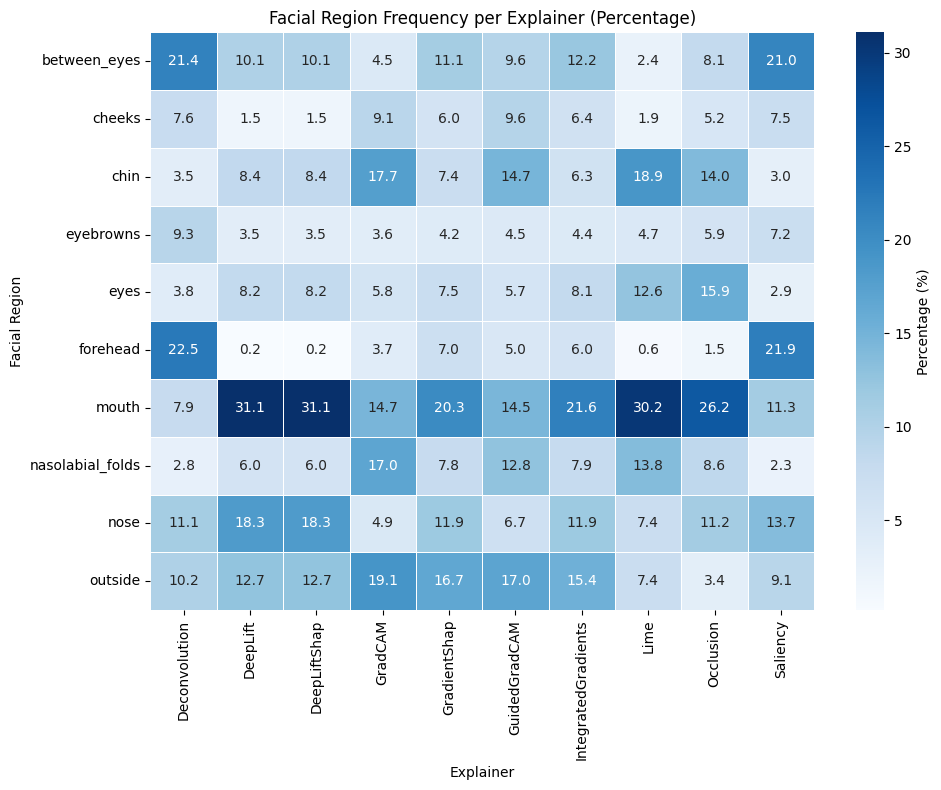

In [25]:
import ast
from collections import Counter
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CSV_PATH = Path(r"RGU\ViT_B_32\ViT_B_32_top_regions.csv")

df = pd.read_csv(CSV_PATH)
df["regions"] = df["regions"].apply(ast.literal_eval)

counts = {}
for explainer, group in df.groupby("explainer"):
    counter = Counter()
    for regions in group["regions"]:
        counter.update(regions)
    counts[explainer] = counter

if not counts:
    raise RuntimeError("No regions found to plot.")

all_regions = sorted({region for counter in counts.values() for region in counter})

heatmap_data = pd.DataFrame(
    {explainer: [counter.get(region, 0) for region in all_regions]
     for explainer, counter in counts.items()},
    index=all_regions,
)

percent_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1) * 100

plt.figure(figsize=(0.6 * len(percent_data.columns) + 4,
                    0.5 * len(percent_data.index) + 3))
sns.heatmap(
    percent_data,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    cbar_kws={"label": "Percentage (%)"},
    linewidths=0.5,
    linecolor="white",
)
plt.title("Facial Region Frequency per Explainer (Percentage)")
plt.xlabel("Explainer")
plt.ylabel("Facial Region")
plt.tight_layout()
plt.show()


#### Agreement between 2 explainers

In [ ]:
# Example usage:
agreements = pairwise_agreement(samples)
agreements.to_csv("RGU\\ViT_B_32_agreement.csv", index=False)

In [ ]:
def summarize_pairwise_pixel(agreements: pd.DataFrame) -> pd.DataFrame:
    agg = (
        agreements
        .groupby(["method_a", "method_b"])["pixel"]
        .agg(mean_pixel="mean", std_pixel="std", n="count")
        .reset_index()
        .sort_values("mean_pixel", ascending=False)
    )
    return agg

def summarize_pairwise_region(agreements: pd.DataFrame) -> pd.DataFrame:
    agg = (
        agreements
        .groupby(["method_a", "method_b"])["region"]
        .agg(mean_region="mean", std_region="std", n="count")
        .reset_index()
        .sort_values("mean_region", ascending=False)
    )
    return agg

summary = summarize_pairwise_pixel(agreements)

top10_md = summary.head(10).to_markdown(index=False, floatfmt=".4f")
print("Top 10 pairwise IoU (Markdown):")
print(top10_md)

print("\nHighest agreement:")
print(summary.iloc[0])



In [ ]:
summary_regions = summarize_pairwise_region(agreements)

top10_md = summary_regions.head(10).to_markdown(index=False, floatfmt=".4f")
print("Top 10 pairwise IoU (Markdown):")
print(top10_md)

print("\nHighest agreement:")
print(summary_regions.iloc[0])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assumes `summary` as from summarize_pairwise_iou(agreements)
methods = sorted(set(summary["method_a"]).union(summary["method_b"]))
matrix = summary.pivot(index="method_a", columns="method_b", values="mean_pixel").reindex(index=methods, columns=methods)

# mirror upper/lower triangles to fill the diagonal and lower half
matrix = matrix.combine_first(matrix.T)
np.fill_diagonal(matrix.values, 1.0)

plt.figure(figsize=(8, 7))
sns.heatmap(matrix, vmin=0, vmax=1, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mean IoU Agreement Between Explainers")
plt.ylabel("Explainer A")
plt.xlabel("Explainer B")
plt.tight_layout()
plt.show()


In [ ]:
# assumes `summary` as from summarize_pairwise_iou(agreements)
methods = sorted(set(summary_regions["method_a"]).union(summary_regions["method_b"]))
matrix = summary_regions.pivot(index="method_a", columns="method_b", values="mean_region").reindex(index=methods, columns=methods)

# mirror upper/lower triangles to fill the diagonal and lower half
matrix = matrix.combine_first(matrix.T)
np.fill_diagonal(matrix.values, 1.0)

plt.figure(figsize=(8, 7))
sns.heatmap(matrix, vmin=0, vmax=1, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mean IoU Agreement Between Explainers")
plt.ylabel("Explainer A")
plt.xlabel("Explainer B")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# Load your dataframe
df = pd.read_csv("RGU\\ViT_B_32\\ViT_B_32_agreement.csv")

# Parse stringified lists
df["agreed_regions"] = df["agreed_regions"].apply(lambda x: ast.literal_eval(x))

# Expand regions into long format
exploded = df.explode("agreed_regions")

# Count frequencies per explainer pair + region
region_counts = (
    exploded.groupby(["method_a", "method_b", "agreed_regions"])
    .size()
    .reset_index(name="count")
)

# Pivot into matrix (rows=pairs, cols=regions)
heatmap_data = region_counts.pivot_table(
    index=["method_a", "method_b"],
    columns="agreed_regions",
    values="count",
    fill_value=0
)

# ---- Convert to percentage (row-normalized) ----
heatmap_data_pct = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# ---- Heatmap ----
plt.figure(figsize=(16,12))
sns.heatmap(heatmap_data_pct, annot=True, cmap="Blues", fmt=".1f")
plt.title("Region Agreement (%) per Explainer Pair")
plt.ylabel("Explainer Pair")
plt.xlabel("Region")
plt.show()


In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# --- Load your dataframe as before ---
df = pd.read_csv("RGU\\ViT_B_32\\ViT_B_32_agreement.csv")

# Robust parse of the stringified lists
def parse_regions(x):
    if isinstance(x, list):
        return x
    if pd.isna(x) or x.strip() == "" or x.strip() == "[]":
        return []
    return ast.literal_eval(x)

df["agreed_regions"] = df["agreed_regions"].apply(parse_regions)

# Explode to long form (one row per region)
exploded = df.explode("agreed_regions")
exploded = exploded.dropna(subset=["agreed_regions"])  # drop rows where no region agreed

# ---- GLOBAL SUMMARY: percentage of all agreements by region ----
global_counts = exploded["agreed_regions"].value_counts().sort_values(ascending=False)
global_pct = (global_counts / global_counts.sum() * 100).round(2)

# Print a small table
print("Global region agreement (%) across ALL explainer pairs:")
print(global_pct.rename("percent").to_frame())

# ---- Plot (matplotlib only) ----
plt.figure(figsize=(8, 5))
global_pct.sort_values().plot(kind="barh")  # horizontal bar for readability
plt.xlabel("Percentage of agreements (%)")
plt.ylabel("Region")
plt.title("Global Agreed Regions Across All Explainer Pairs (%)")
plt.tight_layout()
plt.show()


## Plot examples

In [ ]:
from pathlib import Path
import numpy as np
from skimage.transform import AffineTransform, warp
import cv2
import os
import pickle
from tqdm import tqdm

HEATMAP_DIR = Path(r"RGU\ViT_B_32")
LANDMARK_DIR = Path(r"Datasets\DatasetFaces\Landmarks")
ALIGN_INDICES = np.array([86, 52, 61, 88, 38])  # order matters
ALIGN_SUBDIR = "aligned"

# Load all landmark meshes and compute the mean reference subset.
faces = []
for fname in os.listdir(LANDMARK_DIR):
    with open(LANDMARK_DIR / fname, "rb") as f:
        faces.append(np.array(pickle.load(f)))

faces_np = np.array(faces)
face_mesh_mean = faces_np.mean(axis=0)
AVG_SUBSET = face_mesh_mean[ALIGN_INDICES]


def load_heatmap(path: Path) -> tuple[np.ndarray, tuple[int, int], np.dtype]:
    mask = np.load(path)["mask"]
    return cv2.resize(mask, (512, 512)), mask.shape, mask.dtype


def load_landmarks(path: Path) -> np.ndarray:
    with open(path, "rb") as f:
        return np.array(pickle.load(f))


def align_heatmaps(
    heatmap_dir: Path = HEATMAP_DIR,
    landmark_dir: Path = LANDMARK_DIR,
    output_shape: tuple[int, int] | None = None,
) -> dict[str, np.ndarray]:
    aligned: dict[str, np.ndarray] = {}

    for explainer_path in tqdm(sorted(heatmap_dir.iterdir()), desc="Explainers"):
        if not explainer_path.is_dir():
            continue

        aligned_dir = explainer_path / ALIGN_SUBDIR
        aligned_dir.mkdir(parents=True, exist_ok=True)

        for heatmap_path in sorted(explainer_path.iterdir()):
            if heatmap_path.suffix.lower() != ".npz":
                continue

            lm_path = landmark_dir / f"{heatmap_path.stem}.pkl"
            if not lm_path.exists():
                print(f"Skip {heatmap_path.name} (missing landmarks at {lm_path})")
                continue

            heatmap, original_shape, original_dtype = load_heatmap(heatmap_path)
            sample_landmarks = load_landmarks(lm_path)
            sample_subset = sample_landmarks[ALIGN_INDICES]

            transform = AffineTransform()
            if not transform.estimate(sample_subset, AVG_SUBSET):
                print(f"Failed to estimate affine transform for {heatmap_path.name}")
                continue

            target_shape = (
                output_shape if output_shape is not None else heatmap.shape[:2]
            )
            warped = warp(
                heatmap,
                inverse_map=transform.inverse,
                output_shape=target_shape,
                preserve_range=True,
            ).astype(original_dtype, copy=False)

            restored = cv2.resize(
                warped,
                (original_shape[1], original_shape[0]),
            ).astype(original_dtype, copy=False)

            aligned_path = aligned_dir / f"{heatmap_path.stem}.npz"
            np.savez_compressed(aligned_path, mask=restored)

    return aligned


if __name__ == "__main__":
    aligned_masks = align_heatmaps()


Explainers:  25%|██▌       | 3/12 [02:44<08:16, 55.18s/it]c:\Users\leona\anaconda3\envs\doutorado\lib\site-packages\skimage\transform\_warps.py:738: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
c:\Users\leona\anaconda3\envs\doutorado\lib\site-packages\skimage\transform\_warps.py:742: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)
Explainers: 100%|██████████| 12/12 [08:59<00:00, 44.96s/it]


## Align Images

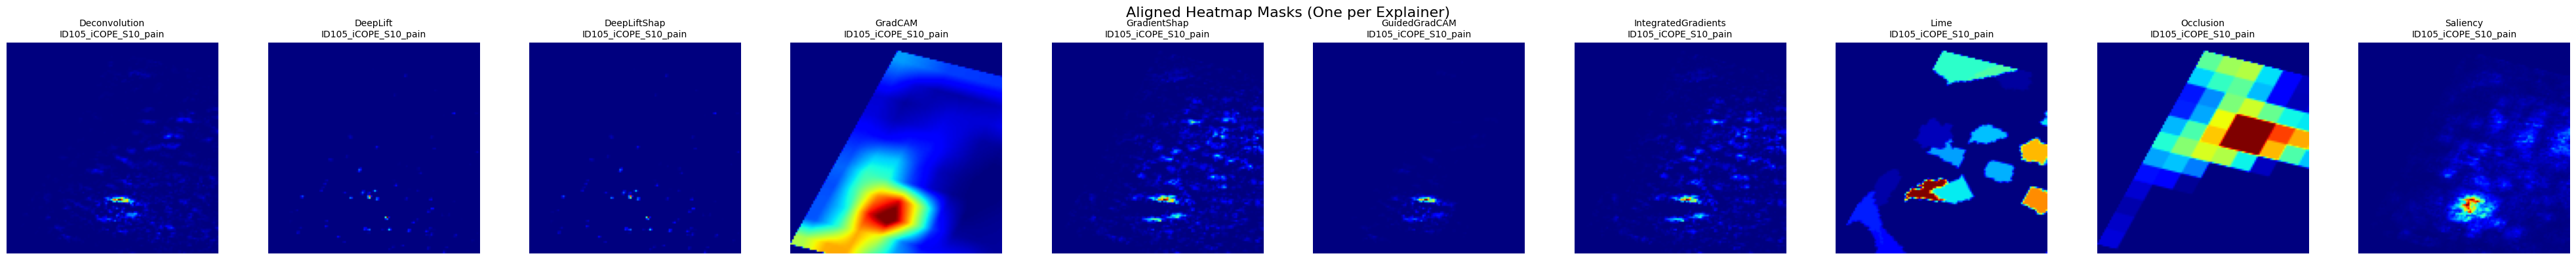

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

HEATMAP_DIR = Path(r"RGU\NCNN")
ALIGN_SUBDIR = "aligned"

def first_aligned_masks(base_dir: Path):
    seen = {}
    for explainer_dir in sorted(base_dir.iterdir()):
        aligned_dir = explainer_dir / ALIGN_SUBDIR
        if not aligned_dir.is_dir():
            continue
        for aligned_file in sorted(aligned_dir.glob("*.npz")):
            with np.load(aligned_file) as data:
                if "mask" not in data:
                    continue
                seen.setdefault(
                    explainer_dir.name,
                    (aligned_file.stem, data["mask"])
                )
            if explainer_dir.name in seen:
                break
    if not seen:
        raise RuntimeError("No aligned heatmaps found in explainer subfolders.")
    return seen

explainer_map = first_aligned_masks(HEATMAP_DIR)

n_show = len(explainer_map)
fig, axes = plt.subplots(1, n_show, figsize=(4 * n_show, 4))
if n_show == 1:
    axes = [axes]

for ax, (explainer, (name, mask)) in zip(axes, explainer_map.items()):
    ax.imshow(mask, cmap="jet")
    ax.set_title(f"{explainer}\n{name}", fontsize=10)
    ax.axis("off")

fig.suptitle("Aligned Heatmap Masks (One per Explainer)", fontsize=16)
plt.tight_layout()
plt.show()


### PCA & TSNE Vizu

c:\Users\leona\anaconda3\envs\doutorado\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\leona\anaconda3\envs\doutorado\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\leona\anaconda3\envs\doutorado\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\leona\anaconda3\envs\doutorado\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\leona\anaconda3\envs\doutorado\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.Cre

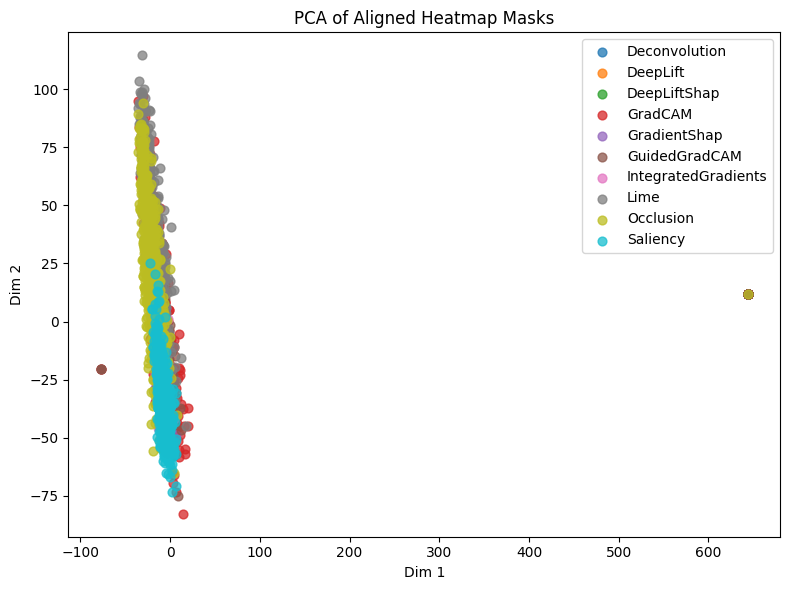

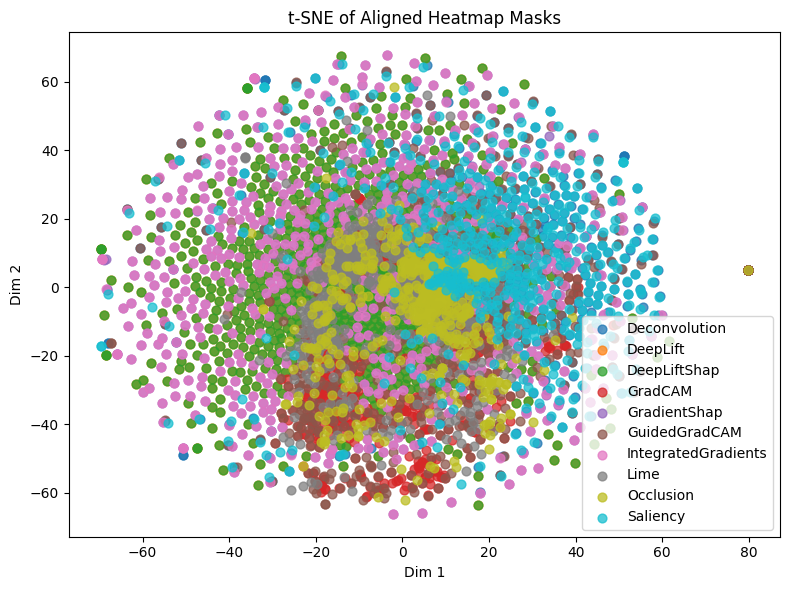

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

HEATMAP_DIR = Path(r"RGU\ViT_B_32")
ALIGN_SUBDIR = "aligned"

# Function to classify pixels by importance
def get_top_k_pixels(importance_map, k_percent=10):

    # Flatten the map and sort the pixels by importance
    flat_map = importance_map.flatten()
    threshold_value = np.percentile(flat_map, 100 - k_percent)
    top_k_mask = importance_map >= threshold_value

    return top_k_mask.astype('int')

def load_aligned_masks(base_dir: Path):
    keys, masks = [], []
    for explainer_dir in sorted(base_dir.iterdir()):
        aligned_dir = explainer_dir / ALIGN_SUBDIR
        if not aligned_dir.is_dir():
            continue
        for aligned_file in sorted(aligned_dir.glob("*.npz")):
            with np.load(aligned_file) as data:
                if "mask" not in data:
                    continue
                mask = get_top_k_pixels(data["mask"].astype(np.float32, copy=False), 10)
                if np.isnan(mask).any():
                    mask = np.nan_to_num(mask, copy=False)  # replace NaNs
            keys.append(f"{explainer_dir.name}/{aligned_file.stem}")
            masks.append(mask.ravel())
    if not masks:
        raise RuntimeError("No aligned heatmaps found in explainer subfolders.")
    return keys, np.stack(masks)

keys, masks = load_aligned_masks(HEATMAP_DIR)
explainers = [k.split("/", 1)[0] for k in keys]

scaler = StandardScaler(with_mean=True, with_std=True)
masks_std = scaler.fit_transform(masks)

pca = PCA(n_components=2, random_state=0)
components_pca = pca.fit_transform(masks_std)

tsne = TSNE(n_components=2, random_state=0, init="pca", perplexity=30, learning_rate="auto")
components_tsne = tsne.fit_transform(masks_std)

unique_explainers = sorted(set(explainers))
palette = plt.cm.get_cmap("tab10", len(unique_explainers))
color_map = dict(zip(unique_explainers, palette.colors))

def scatter_embedding(embedding, title):
    plt.figure(figsize=(8, 6))
    for explainer in unique_explainers:
        idx = [i for i, e in enumerate(explainers) if e == explainer]
        plt.scatter(
            embedding[idx, 0],
            embedding[idx, 1],
            s=40,
            color=color_map[explainer],
            label=explainer,
            alpha=0.75,
        )
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

scatter_embedding(components_pca, "PCA of Aligned Heatmap Masks")
scatter_embedding(components_tsne, "t-SNE of Aligned Heatmap Masks")


### PCA Components Walk

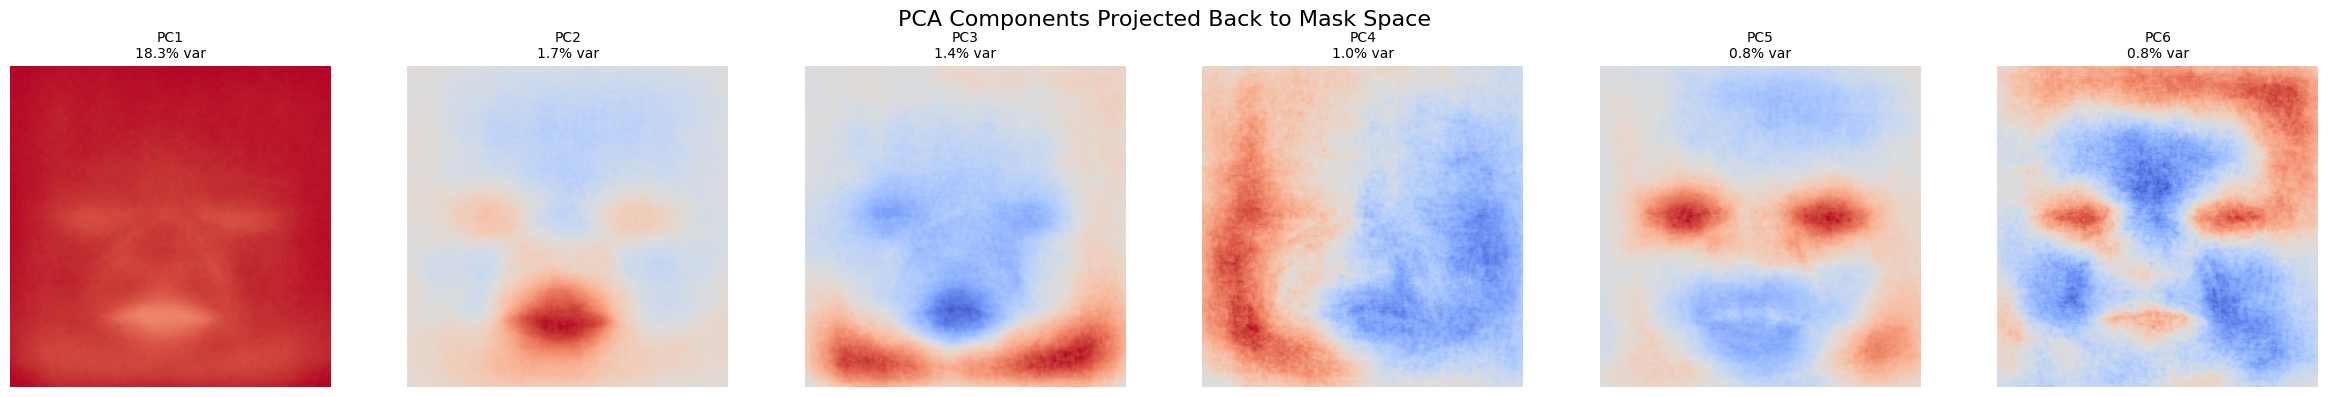

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

HEATMAP_DIR = Path(r"RGU\ViT_B_32")
ALIGN_SUBDIR = "aligned"
N_COMPONENTS = 6  # adjust if you want to see more/less components

def load_aligned_masks(base_dir: Path):
    keys, masks = [], []
    mask_shape = None
    for explainer_dir in sorted(base_dir.iterdir()):
        aligned_dir = explainer_dir / ALIGN_SUBDIR
        if not aligned_dir.is_dir():
            continue
        for aligned_file in sorted(aligned_dir.glob("*.npz")):
            with np.load(aligned_file) as data:
                if "mask" not in data:
                    continue
                mask = get_top_k_pixels(data["mask"].astype(np.float32, copy=False), 10)
                if np.isnan(mask).any():
                    mask = np.nan_to_num(mask, copy=False)
            if mask_shape is None:
                mask_shape = mask.shape
            elif mask.shape != mask_shape:
                raise ValueError(f"Mask shape mismatch: {mask.shape} vs {mask_shape}")
            keys.append(f"{explainer_dir.name}/{aligned_file.stem}")
            masks.append(mask.ravel())
    if not masks:
        raise RuntimeError("No aligned heatmaps found in explainer subfolders.")
    return keys, np.stack(masks), mask_shape

keys, masks_flat, mask_shape = load_aligned_masks(HEATMAP_DIR)

scaler = StandardScaler(with_mean=True, with_std=True)
masks_std = scaler.fit_transform(masks_flat)

n_components = min(N_COMPONENTS, masks_std.shape[0], masks_std.shape[1])
pca = PCA(n_components=n_components, random_state=0)
pca.fit(masks_std)

component_images = []
for idx, component in enumerate(pca.components_):
    # map the standardized principal direction back to original mask space
    component_orig = (component * scaler.scale_).reshape(mask_shape)
    component_images.append(component_orig)

fig, axes = plt.subplots(1, n_components, figsize=(4 * n_components, 4))
if n_components == 1:
    axes = [axes]

for ax, comp_img, idx in zip(axes, component_images, range(n_components)):
    vmax = np.max(np.abs(comp_img))
    ax.imshow(comp_img, cmap="coolwarm", vmin=-vmax, vmax=vmax)
    ax.set_title(f"PC{idx + 1}\n{pca.explained_variance_ratio_[idx] * 100:.1f}% var", fontsize=10)
    ax.axis("off")

fig.suptitle("PCA Components Projected Back to Mask Space", fontsize=16)
plt.tight_layout()
plt.show()


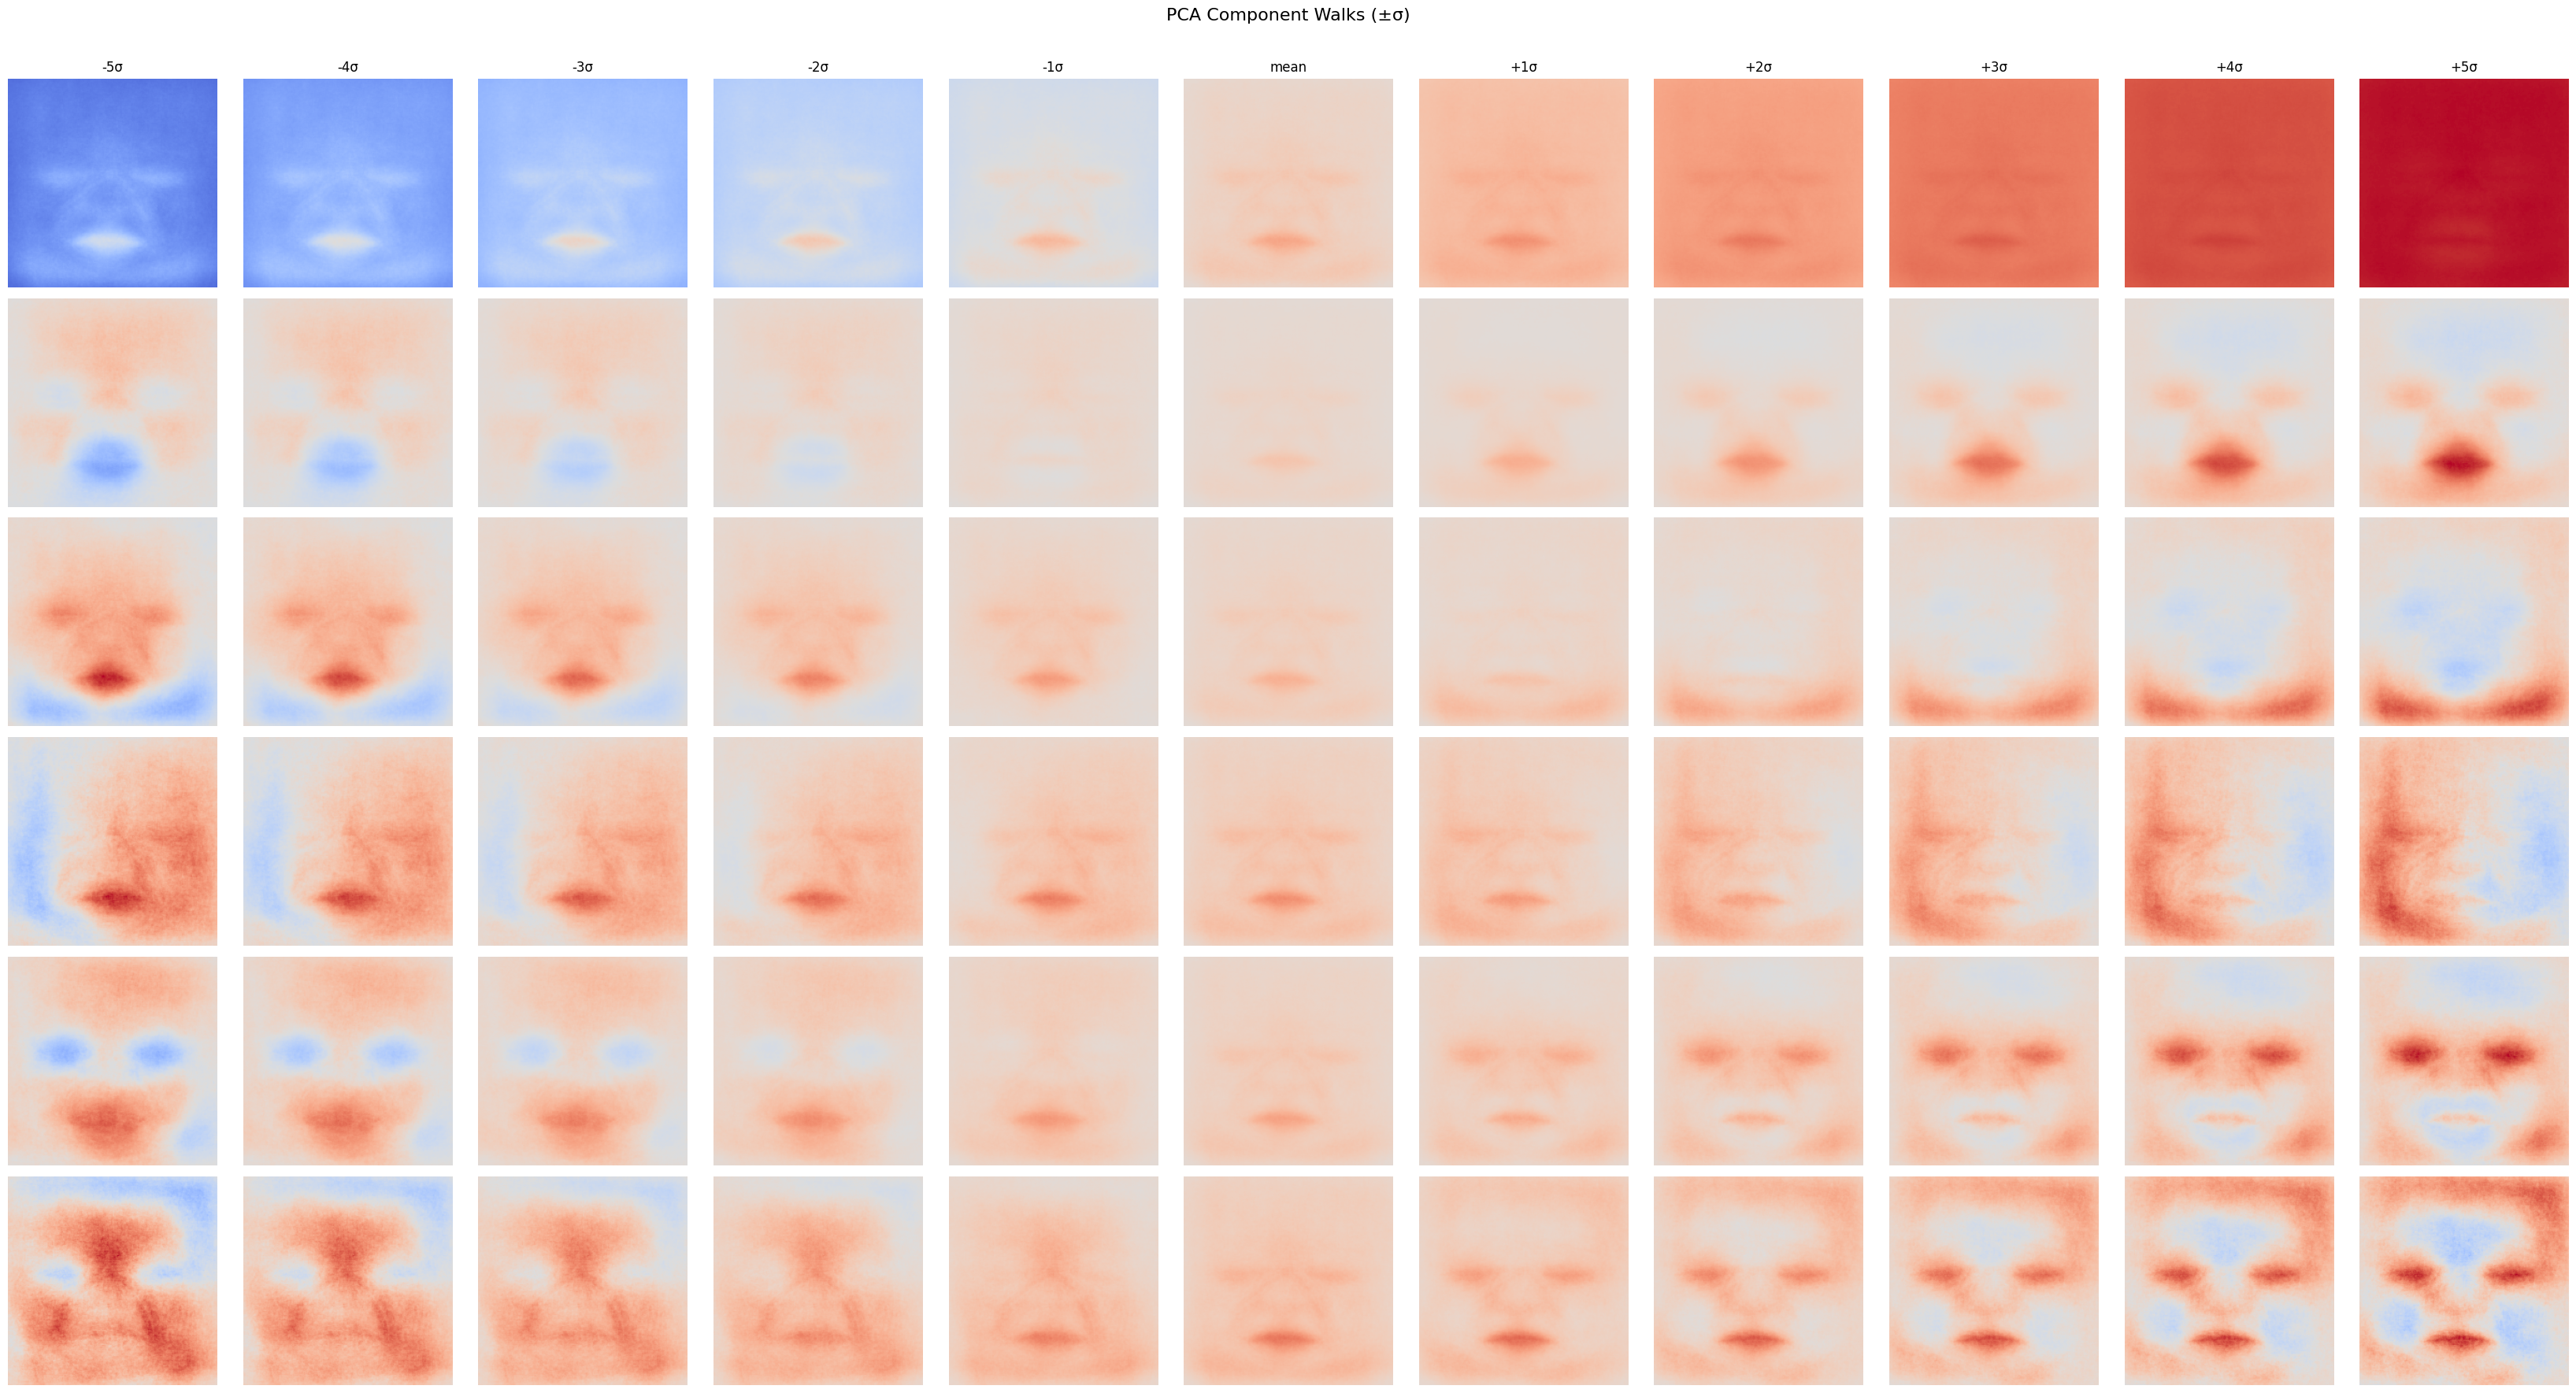

In [4]:
def inverse_standardize(flat_array):
    flat_array = np.asarray(flat_array).reshape(1, -1)
    return scaler.inverse_transform(flat_array)[0]

def component_walk_images(component_idx: int, steps):
    direction = pca.components_[component_idx]
    std = np.sqrt(pca.explained_variance_[component_idx])
    base = pca.mean_
    factors = [-s for s in reversed(steps)] + [0] + list(steps)

    samples_std = [base + factor * std * direction for factor in factors]
    samples_orig = [inverse_standardize(vec) for vec in samples_std]
    images = [sample.reshape(mask_shape) for sample in samples_orig]
    labels = [f"{factor:+.0f}σ" if factor else "mean" for factor in factors]
    return labels, images

def plot_component_walks(components=None, steps=(1, 2, 3, 4, 5)):
    if components is None:
        components = range(pca.n_components)
    components = list(components)
    if not components:
        raise ValueError("No components selected.")

    n_cols = len(steps) * 2 + 1
    fig, axes = plt.subplots(
        len(components),
        n_cols,
        figsize=(3 * n_cols, 3 * len(components)),
        squeeze=False,
    )

    col_labels, _ = component_walk_images(components[0], steps)
    for col, label in enumerate(col_labels):
        axes[0, col].set_title(label, fontsize=12)

    for row, comp_idx in enumerate(components):
        labels, images = component_walk_images(comp_idx, steps)
        vmax = max(np.max(np.abs(img)) for img in images)
        for col, img in enumerate(images):
            ax = axes[row, col]
            ax.imshow(img, cmap="coolwarm", vmin=-vmax, vmax=vmax)
            ax.axis("off")
        axes[row, 0].set_ylabel(
            f"PC{comp_idx + 1}\n({pca.explained_variance_ratio_[comp_idx] * 100:.1f}% var)",
            rotation=0,
            ha="right",
            va="center",
            fontsize=11,
        )

    fig.suptitle("PCA Component Walks (±σ)", fontsize=16)
    fig.tight_layout(rect=(0, 0, 1, 0.97))
    plt.show()

# Example: plot walks for the first 6 components
plot_component_walks(components=range(n_components), steps=(1, 2, 3, 4, 5))


# Edge Detector

# TCAV

In [1]:
import numpy as np
import os, glob

import matplotlib.pyplot as plt

from PIL import Image

from scipy.stats import ttest_ind

# ..........torch imports............
import torch
import torchvision

from torch.utils.data import IterableDataset, DataLoader
from torchvision import transforms

#.... Captum imports..................
from captum.attr import LayerGradientXActivation, LayerIntegratedGradients

from captum.concept import TCAV
from captum.concept import Concept

from captum.concept._utils.data_iterator import dataset_to_dataloader, CustomIterableDataset
from captum.concept._utils.common import concepts_to_str

from models import *
from dataloaders import PresetTransform

c:\Users\leona\anaconda3\envs\doutorado\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [69]:
# Method to normalize an image to Imagenet mean and standard deviation
def transform(img):
    return PresetTransform("VGGFace").transforms(img)

In [70]:
def get_tensor_from_filename(filename):
    img = Image.open(filename).convert("RGB")
    img = Image.fromarray(np.array(img)[:, :, ::-1]) # VGG
    return transform(img)


def load_image_tensors(class_name, root_path='RGU\\TCAV\\concepts\\test images\\', transform=True):
    path = os.path.join(root_path, class_name)
    filenames = glob.glob(path + '/*.jpg')

    tensors = []
    for filename in filenames:
        img = Image.open(filename).convert('RGB')
        tensors.append(transform(img) if transform else img)
    
    return tensors

In [71]:
def assemble_concept(name, id, concepts_path="RGU\\TCAV\\concepts"):
    concept_path = os.path.join(concepts_path, name) + "/"
    dataset = CustomIterableDataset(get_tensor_from_filename, concept_path)
    concept_iter = dataset_to_dataloader(dataset)

    return Concept(id=id, name=name, data_iter=concept_iter)

In [72]:
concepts_path = "RGU\\TCAV\\concepts"

closed_eyes_concept = assemble_concept("closed eyes", 0, concepts_path=concepts_path)
open_eyes_concept = assemble_concept("open eyes", 1, concepts_path=concepts_path)
closed_mouth_concept = assemble_concept("closed mouth", 2, concepts_path=concepts_path)
open_mouth_concept = assemble_concept("open mouth", 3, concepts_path=concepts_path)

adult_concept = assemble_concept("adult", 4, concepts_path=concepts_path)
child_concept = assemble_concept("child", 5, concepts_path=concepts_path)

random_0_concept = assemble_concept("random_0", 6, concepts_path=concepts_path)
random_1_concept = assemble_concept("random_1", 7, concepts_path=concepts_path)


NFCS_0_concept = assemble_concept("NFCS_0", 8, concepts_path=concepts_path)
NFCS_1_concept = assemble_concept("NFCS_1", 9, concepts_path=concepts_path)
NFCS_2_concept = assemble_concept("NFCS_2", 10, concepts_path=concepts_path)
NFCS_3_concept = assemble_concept("NFCS_3", 11, concepts_path=concepts_path)
NFCS_4_concept = assemble_concept("NFCS_4", 12, concepts_path=concepts_path)
NFCS_5_concept = assemble_concept("NFCS_5", 13, concepts_path=concepts_path)

In [ ]:
n_figs = 10
n_concepts = 6

fig, axs = plt.subplots(n_concepts, n_figs + 1, figsize = (25, 4 * n_concepts))

for c, concept in enumerate([closed_eyes_concept, open_eyes_concept, closed_mouth_concept, open_mouth_concept, random_0_concept, random_1_concept]):
    concept_path = os.path.join(concepts_path, concept.name) + "/"
    img_files = glob.glob(concept_path + '*')
    for i, img_file in enumerate(img_files[:n_figs + 1]):
        if os.path.isfile(img_file):
            if i == 0:
                axs[c, i].text(1.0, 0.5, str(concept.name), ha='right', va='center', family='sans-serif', size=24)
            else:
                img = plt.imread(img_file)
                axs[c, i].imshow(img)

            axs[c, i].axis('off')

In [ ]:
model = ViT()
model.load_state_dict(torch.load('experiments\\ViT_B_32\\20250718_1951_ViT\\Model\\best_model.pt'))
model.eval()

In [51]:
model = NCNN()
model.load_state_dict(torch.load('experiments\\NCNN_FINAL\\20250826_1349_NCNN\\Model\\best_model.pt'))
model.eval()

NCNN(
  (left_branch): Sequential(
    (0): MaxPool2d(kernel_size=10, stride=10, padding=0, dilation=1, ceil_mode=False)
  )
  (center_branch): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.1, inplace=False)
  )
  (right_branch): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=10, stride=10, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.1, inplace=False)
  )
  (merge_branch): Sequential(
    (0): Conv2d(131, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [73]:
model = VGGFace()
model.load_state_dict(torch.load('experiments\\VGGFace_FINAL\\20250826_1353_VGGFace\\Model\\best_model.pt'))
model.eval()

VGGFace(
  (VGGFace): VGG(
    (features): Sequential(
      (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu1_1): ReLU(inplace=True)
      (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu1_2): ReLU(inplace=True)
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu2_1): ReLU(inplace=True)
      (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu2_2): ReLU(inplace=True)
      (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu3_1): ReLU(inplace=True)
      (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu3_2): ReLU(inplace=True)
      (conv3_3): Conv2d(256, 256, kernel_size

In [74]:
#layers=['merge_branch.0', 'left_branch.0', 'center_branch.3', 'right_branch.0']
#layers = ['ViT.encoder.layers.encoder_layer_11', 'ViT.encoder.layers.encoder_layer_1', 'ViT.encoder.layers.encoder_layer_6']
layers = ['VGGFace.features.conv5_3']

mytcav = TCAV(model=model,
              layers=layers)

c:\Users\leona\anaconda3\envs\doutorado\lib\site-packages\captum\concept\_core\tcav.py:325: UserWarning: Using default classifier for TCAV which keeps input both train and test datasets in the memory. Consider defining your own classifier that doesn't rely heavily on memory, for large number of concepts, by extending `Classifer` abstract class
  self.classifier = DefaultClassifier()


In [75]:
experimental_set_rand = [[open_mouth_concept, random_0_concept]]

In [76]:
# Load sample images from folder
pain_imgs = load_image_tensors('pain', transform=False)
nopain_imgs = load_image_tensors('nopain', transform=False)

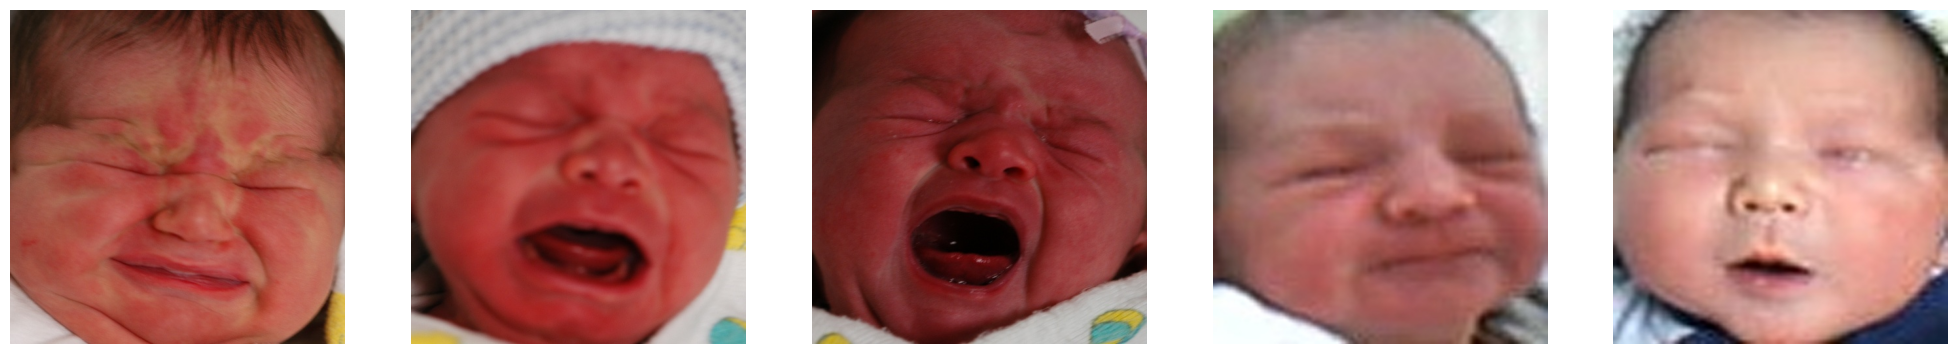

In [63]:
fig, axs = plt.subplots(1, 5, figsize = (25, 5))
axs[0].imshow(pain_imgs[0])
axs[1].imshow(pain_imgs[1])
axs[2].imshow(pain_imgs[2])
axs[3].imshow(pain_imgs[3])
axs[4].imshow(pain_imgs[4])

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
axs[4].axis('off')

plt.show()

In [77]:
# Load sample images from folder
pain_tensors = torch.stack([transform(img) for img in pain_imgs])
nopain_tensors = torch.stack([transform(img) for img in nopain_imgs])

In [78]:
tcav_scores_w_pain = mytcav.interpret(inputs=pain_tensors,
                                        experimental_sets=experimental_set_rand,
                                        )
tcav_scores_w_nopain = mytcav.interpret(inputs=nopain_tensors,
                                        experimental_sets=experimental_set_rand,
                                        )

In [79]:
def format_float(f):
    return float('{:.3f}'.format(f) if abs(f) >= 0.0005 else '{:.3e}'.format(f))

def plot_tcav_scores(experimental_sets, tcav_scores):
    fig, ax = plt.subplots(1, len(experimental_sets), figsize = (25, 7))

    barWidth = 1 / (len(experimental_sets[0]) + 1)

    for idx_es, concepts in enumerate(experimental_sets):

        concepts = experimental_sets[idx_es]
        concepts_key = concepts_to_str(concepts)

        pos = [np.arange(len(layers))]
        for i in range(1, len(concepts)):
            pos.append([(x + barWidth) for x in pos[i-1]])
        _ax = (ax[idx_es] if len(experimental_sets) > 1 else ax)
        for i in range(len(concepts)):
            val = [format_float(scores['sign_count'][i]) for layer, scores in tcav_scores[concepts_key].items()]
            _ax.bar(pos[i], val, width=barWidth, edgecolor='white', label=concepts[i].name)

        # Add xticks on the middle of the group bars
        _ax.set_xlabel('Set {}'.format(str(idx_es)), fontweight='bold', fontsize=16)
        _ax.set_xticks([r + 0.3 * barWidth for r in range(len(layers))])
        _ax.set_xticklabels(layers, fontsize=16)

        # Create legend & Show graphic
        _ax.legend(fontsize=16)

    plt.show()

### Pain

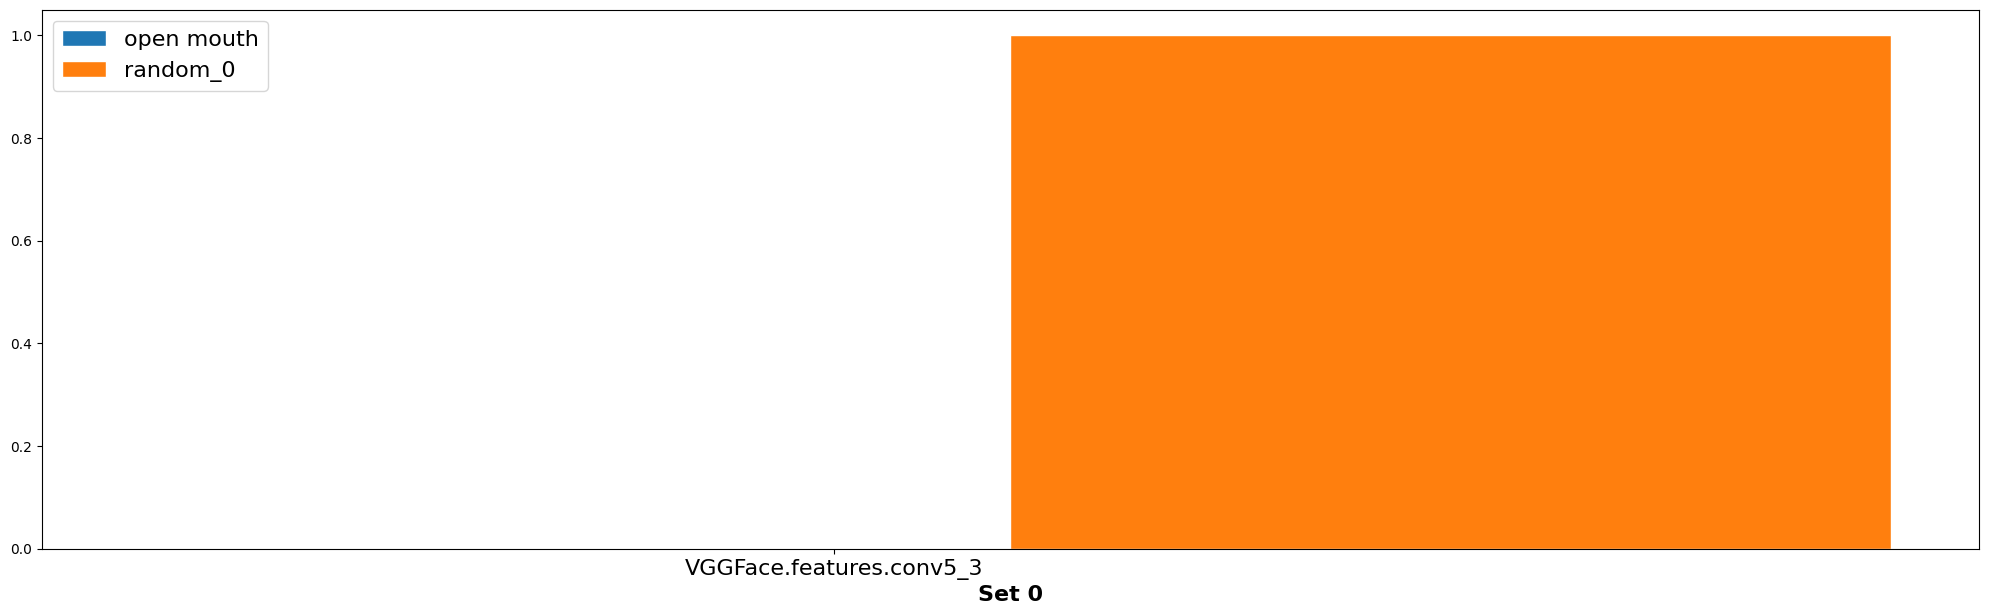

In [80]:
plot_tcav_scores(experimental_set_rand, tcav_scores_w_pain)

### No Pain

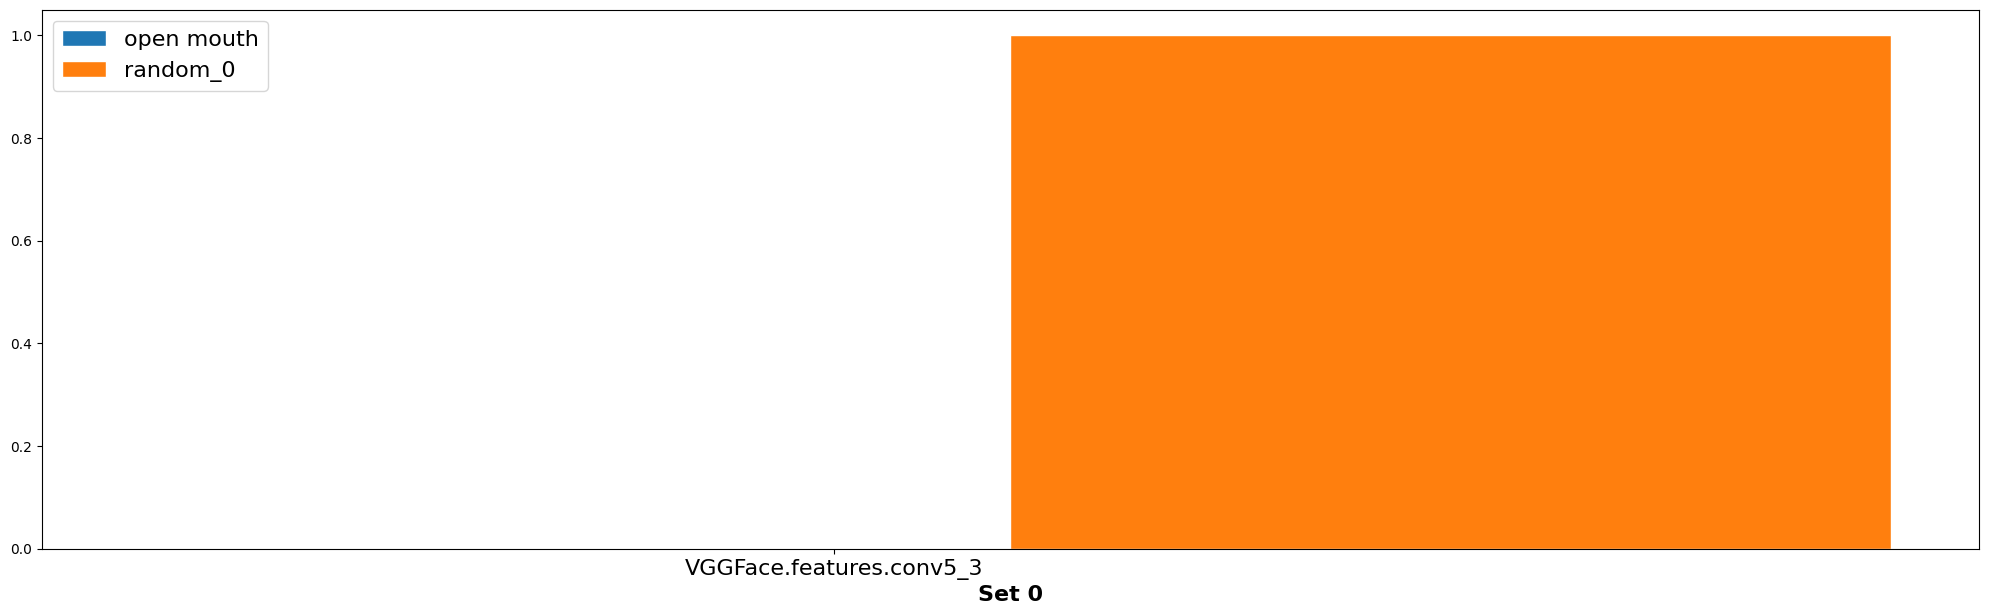

In [81]:
plot_tcav_scores(experimental_set_rand, tcav_scores_w_nopain)

In [ ]:
n = 2

random_concepts = [assemble_concept('random_' + str(i+2), i+8) for i in range(0, n)]

print(random_concepts)

experimental_sets = [[open_eyes_concept, random_0_concept], [open_eyes_concept, random_1_concept]]
experimental_sets.extend([[open_eyes_concept, random_concept] for random_concept in random_concepts])

experimental_sets.append([random_0_concept, random_1_concept])
experimental_sets.extend([[random_0_concept, random_concept] for random_concept in random_concepts])

experimental_sets

In [ ]:
def assemble_scores(scores, experimental_sets, idx, score_layer, score_type):
    score_list = []
    for concepts in experimental_sets:
        score_list.append(scores["-".join([str(c.id) for c in concepts])][score_layer][score_type][idx])
        
    return score_list

In [ ]:
def get_pval(scores, experimental_sets, score_layer, score_type, alpha=0.05, print_ret=False):
    
    P1 = assemble_scores(scores, experimental_sets, 0, score_layer, score_type)
    P2 = assemble_scores(scores, experimental_sets, 1, score_layer, score_type)
    
    if print_ret:
        print('P1[mean, std]: ', format_float(np.mean(P1)), format_float(np.std(P1)))
        print('P2[mean, std]: ', format_float(np.mean(P2)), format_float(np.std(P2)))

    _, pval = ttest_ind(P1, P2)

    if print_ret:
        print("p-values:", format_float(pval))

    if pval < alpha:    # alpha value is 0.05 or 5%
        relation = "Disjoint"
        if print_ret:
            print("Disjoint")
    else:
        relation = "Overlap"
        if print_ret:
            print("Overlap")
        
    return P1, P2, format_float(pval), relation

In [ ]:
scores = mytcav.interpret(pain_tensors, experimental_sets)

In [ ]:
n = 4
def show_boxplots(layer, metric='sign_count'):

    def format_label_text(experimental_sets):
        concept_id_list = [exp.name if i == 0 else \
                             exp.name.split('_')[0] for i, exp in enumerate(experimental_sets[0])]
        return concept_id_list

    n_plots = 2

    fig, ax = plt.subplots(1, n_plots, figsize = (25, 7 * 1))
    fs = 18
    for i in range(n_plots):
        esl = experimental_sets[i * n : (i+1) * n]
        P1, P2, pval, relation = get_pval(scores, esl, layer, metric)

        ax[i].set_ylim([0, 1])
        ax[i].set_title(layer + "-" + metric + " (pval=" + str(pval) + " - " + relation + ")", fontsize=fs)
        ax[i].boxplot([P1, P2], showfliers=True)

        ax[i].set_xticklabels(format_label_text(esl), fontsize=fs)

    plt.show()

In [ ]:
show_boxplots("ViT.encoder")

In [ ]:
show_boxplots("left_branch.0")

In [ ]:
show_boxplots("merge_branch.0")

In [ ]:
show_boxplots("right_branch")

In [ ]:
import pandas as pd
import shutil

In [ ]:
df = pd.read_csv('iCOPE+UNIFESP_data.csv')

In [ ]:
NFCS_df = df[~df['NFCS'].isna()]

NFCS_df.head()

In [ ]:
for i, row in NFCS_df.iterrows():

    NFCS = int(row['NFCS'])
    img_name = row['new_file_name']

    path_from = os.path.join('Datasets\\DatasetFaces\\Images', img_name)

    path_to = os.path.join('RGU\\TCAV\\concepts\\',f"NFCS_{NFCS}",img_name)

    shutil.copy(path_from, path_to)


In [ ]:
img_name

# LIME With Facial Features

In [ ]:
from captum.attr import Lime
from XAI.metrics import  create_face_regions_masks
import pickle
from utils import resize_landmarks
import cv2
import torch
from captum.attr import visualization as viz


In [ ]:
with open(f'Datasets/DatasetFaces/Landmarks/{id}.pkl', 'rb') as f:
    landmarks = pickle.load(f)

test = create_face_regions_masks(landmarks)

test['eyes'] = test['right_eye'] + test['left_eye']
test['eyebrown'] = test['right_eyebrown'] + test['left_eyebrown']
test['nasolabial_fold'] = test['right_nasolabial_fold'] + test['left_nasolabial_fold']
test['cheek'] = test['right_cheek'] + test['left_cheek']

test.pop('right_eye')
test.pop('left_eye')
test.pop('right_eyebrown')
test.pop('left_eyebrown')
test.pop('right_nasolabial_fold')
test.pop('left_nasolabial_fold')
test.pop('right_cheek')
test.pop('left_cheek')
test.pop('outside')

features = np.zeros((img_size,img_size))

for i,mask in enumerate(test):
    features[np.where(cv2.resize(test[mask], (img_size,img_size), interpolation=cv2.INTER_NEAREST) == 1)] = i

features = np.stack([features] * 3, axis=0)

In [ ]:
from captum.attr._core.lime import get_exp_kernel_similarity_function
from captum._utils.models.linear_model import SkLearnLinearRegression, SkLearnLasso


In [ ]:
exp_eucl_distance = get_exp_kernel_similarity_function('euclidean', kernel_width=1000)

def iter_combinations(*args, **kwargs):
    for i in range(2 **  len(test)):
        yield torch.tensor([int(d) for d in bin(i)[2:].zfill( len(test))]).unsqueeze(0)


lr_lime = Lime(
    model, 
    interpretable_model=SkLearnLasso(alpha=0.08),  # build-in wrapped sklearn Linear Regression
    similarity_func=exp_eucl_distance,
    perturb_func=iter_combinations
)


attrs = lr_lime.attribute(
    img_transformed,
    feature_mask=torch.tensor(features, dtype=torch.int64),
    n_samples=2 ** len(test),
    perturbations_per_eval=16,
    show_progress=True
).squeeze(0)

In [ ]:
def show_attr(attr_map):
    viz.visualize_image_attr(
        attr_map.permute(1, 2, 0).numpy(),  # adjust shape to height, width, channels 
        method='heat_map',
        sign='all',
        show_colorbar=True
    )
    
show_attr(attrs.cpu().detach())

# RISE

In [ ]:
from XAI import RISE
from models import NCNN, VGGFace
import torch
from dataloaders import presets
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

device = "cuda"

In [ ]:
rise = RISE(model, input_size=(224,224), gpu_batch=10, device=device)

rise.generate_masks(1000, 8, 0.1)

In [ ]:
plt.imshow(rise.masks[0].cpu()[0])

In [ ]:
model.predict(img_transformed.unsqueeze(0).to(device))

In [ ]:
plt.imshow(mask.cpu())
plt.imshow(img.resize((224,224)), alpha=0.5)